In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from matplotlib import pyplot as plt

In [2]:
class Tabular_Policy_Agent:
        
    def __init__(self,env):
        
        #Hyper parameters
        self.policy_table = {}
        
        
        #
        
        self.num_of_actions = env.action_space.n
        self.env = env
        
        self.episodes = 500
        self.print_out_every_x_episodes = int(self.episodes/50)
        self.times_exploited = 0
        
        
         # hyper parameters for discretising state data
        self.highest = 600000000
        self.lowest = 0
        self.number_bins = 20
        
        # hyper parameters for epsilon explore
        self.initial_epsilon = 1 # initial
        self.decrease_factor = (1/self.episodes)/1.25 # epsilon
        print("Decrease Factor: " + str(self.decrease_factor))
        
    def continous_to_discrete(self,continous_state):
        bins = np.linspace(self.lowest,self.highest,num=self.number_bins)
        discrete = np.digitize(continous_state,bins)
        return tuple(discrete)
    
    def run_all_episodes(self):
        all_rewards = []
        epislon = self.initial_epsilon # at the start only explore
        
        
        
        for episode in range(1, self.episodes + 1):
            states,rewards = self.run_episode(epislon)
            total_reward = np.sum(rewards)

            if episode % self.print_out_every_x_episodes == 0:
                print("Episode number: " + str(episode) + ". Total reward in episode: " + str(total_reward) + ". Episode executed with epsilon = " + str(epislon))
                print("Average total reward in last " + str(self.print_out_every_x_episodes) + " episodes: " + str(np.mean(all_rewards[-self.print_out_every_x_episodes:])))
                print("Times exploited the last episode " + str(self.times_exploited))
                print("-----")
            self.times_exploited = 0
            all_rewards.append(total_reward)
            epislon -= self.decrease_factor #hyperparameter
            
        #returns all rewards and the last episodes state
        return states,all_rewards
    
    def run_episode(self,epislon):
        rewards = []
        states = []
        actions = []
        done = False
        
        state = self.env.reset()
        states.append(state)
      
        
        while not done:
            random_number = np.random.random()
            if random_number < epislon:
                #explore
                action = np.random.choice(self.num_of_actions)
                
            else:
                #exploit
                action = self.get_action(state)
                self.times_exploited += 1
              
            
            new_state, reward, done, i = self.env.step(action=action)
            
            
            
            states.append(new_state)
            actions.append(action)    
            rewards.append(reward)
            
            #update policy function
            self.update(new_state,action,reward)
        
            
            state = new_state
        return states,rewards
        
    def update(self,state,action,reward):
        #update the policy table
        state = self.continous_to_discrete(state)
        previous_action,current_best_reward =  self.policy_table.get(state,(-1,-100))
        if reward > current_best_reward:
            self.policy_table[state] = (action,reward)
                                                     
        
    def get_action(self,state):
        #tabular get best action from the policy
        state = self.continous_to_discrete(state)
        action,best_reward = self.policy_table[state]
        return action
    
    def get_action_text(self):
        return action_text
    
    def get_env(self):
        return env
    
    def get_chart_title(self):
        return "Action = " + action_text

In [3]:
def plot(state,agent, rewards):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    labels = ['s[0]: susceptibles', 's[1]: infectious', 's[2]: quarantined', 's[3]: recovereds']
    states = np.array(state)
    for i in range(4):
        axes[0].plot(states[:,i], label=labels[i]);
    axes[0].set_xlabel('weeks since start of epidemic')
    axes[0].set_ylabel('State s(t)')
    axes[0].legend()
    
    axes[1].plot(rewards);
    axes[1].set_xlabel('episode number')
    axes[1].set_ylabel('total reward r(t)')

stochastic=False, noisy=False

Decrease Factor: 0.0016
Episode number: 10. Total reward in episode: -1.455472903962787. Episode executed with epsilon = 0.9855999999999996
Average total reward in last 10 episodes: -1.5887831176779683
Times exploited the last episode 2
-----
Episode number: 20. Total reward in episode: -1.7661674832156036. Episode executed with epsilon = 0.9695999999999991
Average total reward in last 10 episodes: -1.7412476186534296
Times exploited the last episode 1
-----
Episode number: 30. Total reward in episode: -2.2043129271988042. Episode executed with epsilon = 0.9535999999999987
Average total reward in last 10 episodes: -1.6976678282746067
Times exploited the last episode 2
-----
Episode number: 40. Total reward in episode: -1.7493432772339388. Episode executed with epsilon = 0.9375999999999982
Average total reward in last 10 episodes: -1.755642568798296
Times exploited the last episode 6
-----
Episode number: 50. Total reward in episode: -1.5716098436807318. E

Episode number: 380. Total reward in episode: -1.4374392276579475. Episode executed with epsilon = 0.39359999999998635
Average total reward in last 10 episodes: -1.784909350679372
Times exploited the last episode 30
-----
Episode number: 390. Total reward in episode: -1.6701147885433894. Episode executed with epsilon = 0.37759999999998645
Average total reward in last 10 episodes: -1.7159041093210472
Times exploited the last episode 34
-----
Episode number: 400. Total reward in episode: -1.8636304763518643. Episode executed with epsilon = 0.36159999999998654
Average total reward in last 10 episodes: -1.7129805263198716
Times exploited the last episode 36
-----
Episode number: 410. Total reward in episode: -1.5903031552623712. Episode executed with epsilon = 0.34559999999998664
Average total reward in last 10 episodes: -1.7567808974674193
Times exploited the last episode 32
-----
Episode number: 420. Total reward in episode: -1.7720554701865594. Episode executed with epsilon = 0.32959999

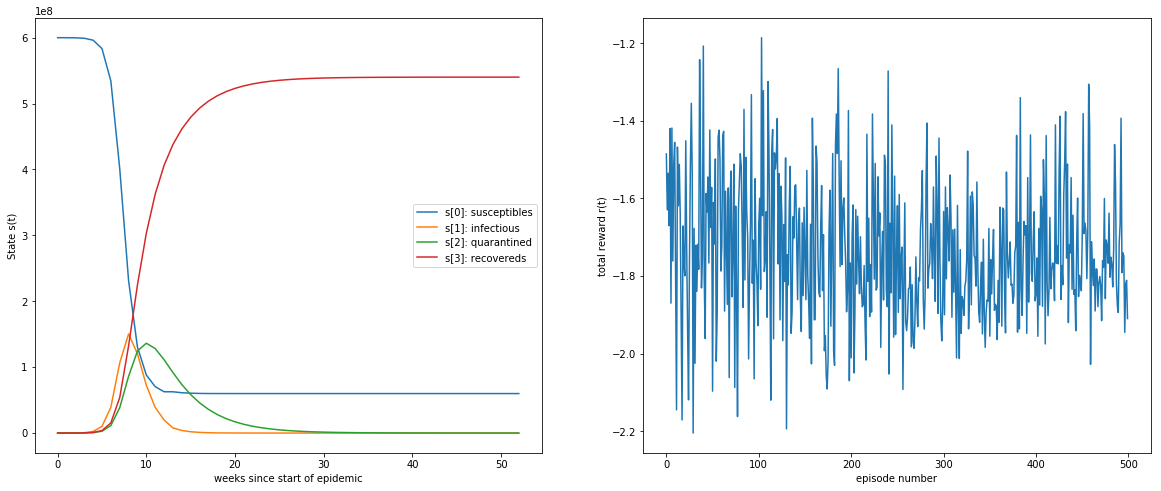

In [4]:
actions = ["no intervention", "impose a full lockdown", "implement track & trace", "enforce social distancing and face masks"]

print("stochastic=False, noisy=False")
print()
env = virl.Epidemic(stochastic=False, noisy=False)
agent = Tabular_Policy_Agent(env)
states,rewards = agent.run_all_episodes()

plot(states,agent,rewards)

stochastic=True, noisy=False

Decrease Factor: 0.0016
Episode number: 10. Total reward in episode: -2.353747211873963. Episode executed with epsilon = 0.9855999999999996
Average total reward in last 10 episodes: -1.8922163634225053
Times exploited the last episode 0
-----
Episode number: 20. Total reward in episode: -1.968367447268413. Episode executed with epsilon = 0.9695999999999991
Average total reward in last 10 episodes: -2.2305278845775405
Times exploited the last episode 1
-----
Episode number: 30. Total reward in episode: -2.6666393121124536. Episode executed with epsilon = 0.9535999999999987
Average total reward in last 10 episodes: -1.8336248251020233
Times exploited the last episode 1
-----
Episode number: 40. Total reward in episode: -1.6404998355148415. Episode executed with epsilon = 0.9375999999999982
Average total reward in last 10 episodes: -1.3430122168511678
Times exploited the last episode 5
-----
Episode number: 50. Total reward in episode: -2.467529624097418. Epi

Episode number: 380. Total reward in episode: -1.4559844307202074. Episode executed with epsilon = 0.39359999999998635
Average total reward in last 10 episodes: -1.7985758386249955
Times exploited the last episode 35
-----
Episode number: 390. Total reward in episode: -2.2582352182864946. Episode executed with epsilon = 0.37759999999998645
Average total reward in last 10 episodes: -1.8664212479334918
Times exploited the last episode 29
-----
Episode number: 400. Total reward in episode: -2.211464414355988. Episode executed with epsilon = 0.36159999999998654
Average total reward in last 10 episodes: -1.8559507511938425
Times exploited the last episode 28
-----
Episode number: 410. Total reward in episode: -2.374762783476472. Episode executed with epsilon = 0.34559999999998664
Average total reward in last 10 episodes: -2.0130455212969736
Times exploited the last episode 26
-----
Episode number: 420. Total reward in episode: -2.1283020343500536. Episode executed with epsilon = 0.329599999

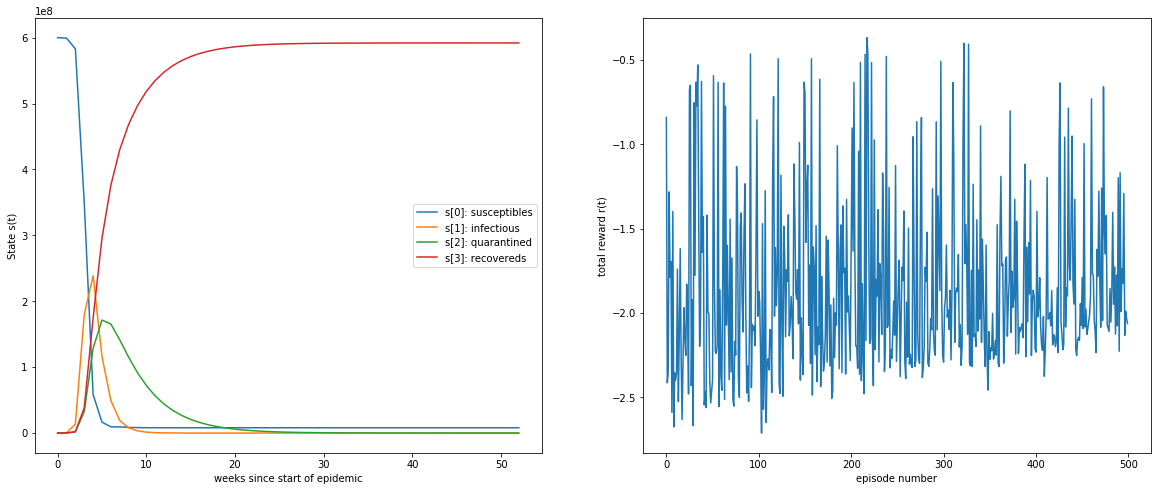

In [5]:
print("stochastic=True, noisy=False")
print()
env = virl.Epidemic(stochastic=True, noisy=False)
agent = Tabular_Policy_Agent(env)
states,rewards = agent.run_all_episodes()

plot(states,agent,rewards)

stochastic=True, noisy=True

Decrease Factor: 0.0016
Episode number: 10. Total reward in episode: -2.0125431438875303. Episode executed with epsilon = 0.9855999999999996
Average total reward in last 10 episodes: -1.8469749756832856
Times exploited the last episode 2
-----
Episode number: 20. Total reward in episode: -2.223737096845107. Episode executed with epsilon = 0.9695999999999991
Average total reward in last 10 episodes: -2.16757944557746
Times exploited the last episode 3
-----
Episode number: 30. Total reward in episode: -2.1335583376659364. Episode executed with epsilon = 0.9535999999999987
Average total reward in last 10 episodes: -1.7720785540592263
Times exploited the last episode 1
-----
Episode number: 40. Total reward in episode: -0.5849207750782381. Episode executed with epsilon = 0.9375999999999982
Average total reward in last 10 episodes: -1.75790089824774
Times exploited the last episode 3
-----
Episode number: 50. Total reward in episode: -2.293662989516115. Episode

Episode number: 380. Total reward in episode: -0.7258683669241708. Episode executed with epsilon = 0.39359999999998635
Average total reward in last 10 episodes: -1.816604250980572
Times exploited the last episode 32
-----
Episode number: 390. Total reward in episode: -2.195383815065566. Episode executed with epsilon = 0.37759999999998645
Average total reward in last 10 episodes: -1.912122688790016
Times exploited the last episode 30
-----
Episode number: 400. Total reward in episode: -1.2609359409108798. Episode executed with epsilon = 0.36159999999998654
Average total reward in last 10 episodes: -1.6806758172038336
Times exploited the last episode 30
-----
Episode number: 410. Total reward in episode: -2.2794401595906857. Episode executed with epsilon = 0.34559999999998664
Average total reward in last 10 episodes: -1.6775551748788018
Times exploited the last episode 31
-----
Episode number: 420. Total reward in episode: -1.2586165271048937. Episode executed with epsilon = 0.3295999999

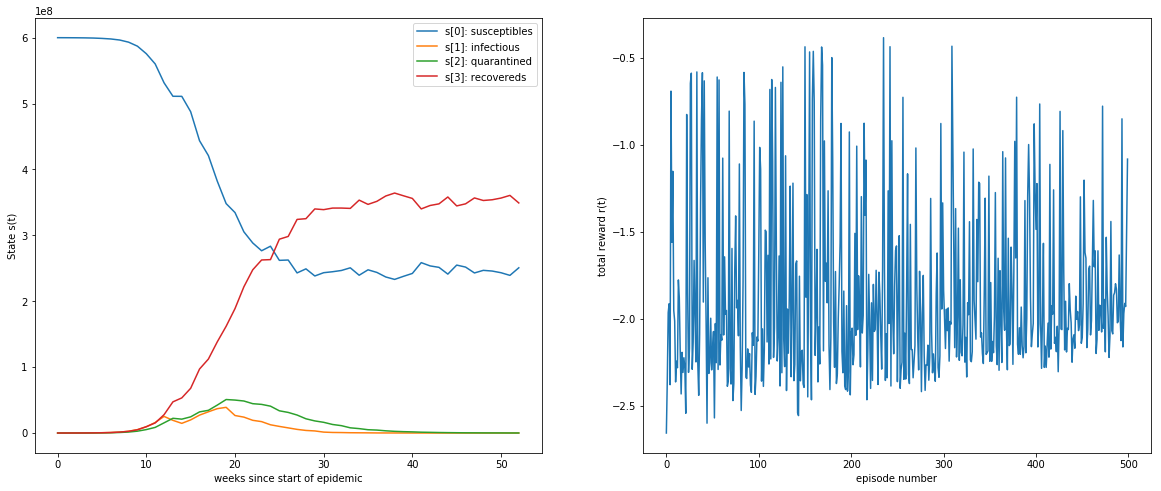

In [6]:
print("stochastic=True, noisy=True")
print()
env = virl.Epidemic(stochastic=True, noisy=True)
agent = Tabular_Policy_Agent(env)
states,rewards = agent.run_all_episodes()

plot(states,agent,rewards)
    


stochastic=False, noisy=True

Decrease Factor: 0.0016
Episode number: 10. Total reward in episode: -1.7236967061511759. Episode executed with epsilon = 0.9855999999999996
Average total reward in last 10 episodes: -1.7784614609577498
Times exploited the last episode 1
-----
Episode number: 20. Total reward in episode: -1.855007094926656. Episode executed with epsilon = 0.9695999999999991
Average total reward in last 10 episodes: -1.7193106556354436
Times exploited the last episode 2
-----
Episode number: 30. Total reward in episode: -1.8472027588486433. Episode executed with epsilon = 0.9535999999999987
Average total reward in last 10 episodes: -1.6807531941660425
Times exploited the last episode 0
-----
Episode number: 40. Total reward in episode: -1.8162287648381388. Episode executed with epsilon = 0.9375999999999982
Average total reward in last 10 episodes: -1.7439097444584122
Times exploited the last episode 2
-----
Episode number: 50. Total reward in episode: -1.5369618444316548. E

Episode number: 380. Total reward in episode: -1.9311144783209533. Episode executed with epsilon = 0.39359999999998635
Average total reward in last 10 episodes: -1.7845074236335836
Times exploited the last episode 27
-----
Episode number: 390. Total reward in episode: -1.7358215900625922. Episode executed with epsilon = 0.37759999999998645
Average total reward in last 10 episodes: -1.7746460389343692
Times exploited the last episode 38
-----
Episode number: 400. Total reward in episode: -2.0055133313518345. Episode executed with epsilon = 0.36159999999998654
Average total reward in last 10 episodes: -1.7864057616056903
Times exploited the last episode 28
-----
Episode number: 410. Total reward in episode: -1.7826498549483627. Episode executed with epsilon = 0.34559999999998664
Average total reward in last 10 episodes: -1.736862464268005
Times exploited the last episode 41
-----
Episode number: 420. Total reward in episode: -1.379221212397891. Episode executed with epsilon = 0.329599999

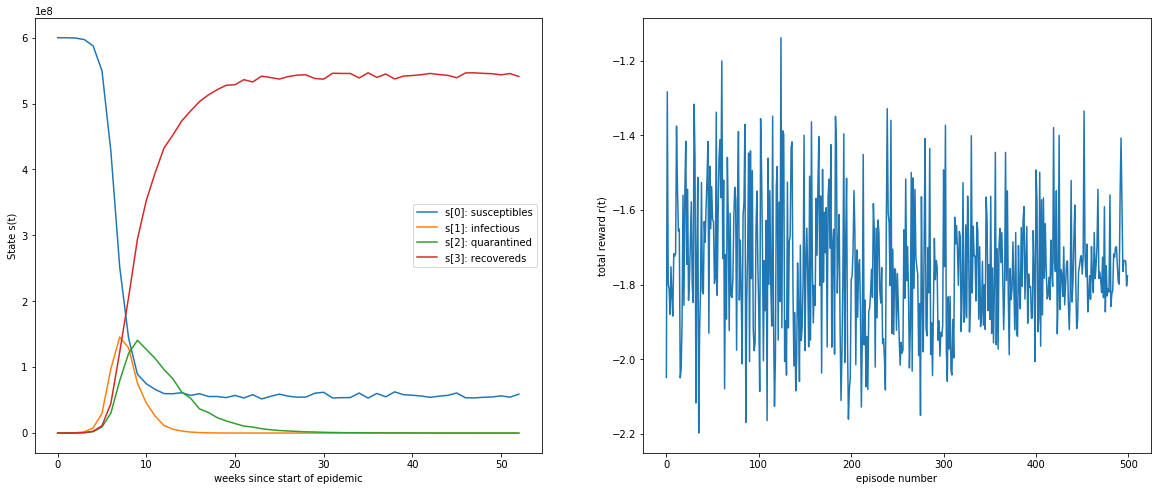

In [7]:
print("stochastic=False, noisy=True")
print()
env = virl.Epidemic(stochastic=False, noisy=True)
agent = Tabular_Policy_Agent(env)
states,rewards = agent.run_all_episodes()

plot(states,agent,rewards)